# Spike Sandbox

The following Colaboratory notebook enables rapid proto-typing of C++ code for the Spike simulator. For an introduction to Spike, click [here](https://sites.google.com/view/spike-simulator/home)

To get started, you can simply run every cell up until the section entitled 'Sandbox'

After that, you will be able to edit, compile, and run C++ code for Spike simulations, using only the commands under Sandbox.

Everytime you want to make a further change to the Sandbox.cpp source code, begin at the top of the Sandbox section.

If you run into an issue and want to start from a clean installation, select 'Restart runtime...' under the 'Runtime' option. Then, begin at the top of this notebook under 'Setting up environment'.

*This Colaboratory notebook was created by members of the [Oxford Foundation for Theoretical Neuroscience and Artificial Intelligence](https://www.oftnai.org/). *

#Setup

## Setting up environment

The following lines of code are useful if you want to do a clean re-installation of Spike and its dependencies. If you are running this Colab document for the first time, you can skip to the !git clone cell, but running these commands will not cause any issues.

In [1]:
cd /content

/content


In [0]:
#rm -rf PolyNetwork_CppTools #Run if Spike folder is present

In [3]:
ls

sample_data/


In [4]:
!git clone --recursive https://github.com/nielsleadholm/PolyNetwork_CppTools #Note '!' is necessary in Colab to run shell commands
!apt update #apt = 'Advanced Package Tool'; checks the versions of various files and update as necessary
!apt install cmake

Cloning into 'PolyNetwork_CppTools'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 31 (delta 8), reused 29 (delta 6), pack-reused 0
Unpacking objects: 100% (31/31), done.
Submodule 'Spike' (https://github.com/nasiryahm/Spike) registered for path 'Spike'
Cloning into '/content/PolyNetwork_CppTools/Spike'...
remote: Enumerating objects: 198, done.        
remote: Counting objects: 100% (198/198), done.        
remote: Compressing objects: 100% (105/105), done.        
remote: Total 12478 (delta 128), reused 145 (delta 93), pack-reused 12280        
Receiving objects: 100% (12478/12478), 44.50 MiB | 22.70 MiB/s, done.
Resolving deltas: 100% (9636/9636), done.
Submodule path 'Spike': checked out 'b35e8726a3a4a3314a0e4abba10729ec638327b1'
Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http

In [5]:
!apt --fix-broken install #Run if an error message is returned following !apt update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [6]:
cd /content/PolyNetwork_CppTools

/content/PolyNetwork_CppTools


In [7]:
!git pull 
!git checkout master 

Already up to date.
Already on 'master'
Your branch is up to date with 'origin/master'.


In [8]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb; #wget downloads a file stored at a url
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb;
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub;
!apt-get update;
!apt-get install cuda gcc-5 g++-5 -y;
!apt install cuda-8.0;

--2019-04-25 14:45:55--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.182.215
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.182.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?XpbTL3n5Tk071tgxxP7_9zJ2f0_MIIs-n0xOmfZIYzSKWxZ29DK5xtAnEoX9GWc_UJTNHk5DL6mgfG1gVHMe3aUN-q1YqKvFfvOzq28YvGCkeuStiHSl3k621dStGdpVL5daQZByg1QrY_N7UInTe2fnok1NyVfMTzuDnucaWhky7OlW5n8lH_OwPoTaWtd0qmuE90HJQ4MR_j_s0N4NnEOeEw [following]
--2019-04-25 14:45:55--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?XpbTL3n5Tk071tgxxP7_9zJ2f0_MIIs-n0xOmfZIYzSKWxZ29DK5xtAnEoX9GWc_UJTNHk5DL6mgfG1gVHMe3aUN-q1Y

## Testing NVCC & CMake Setup

In [9]:
cd /content/PolyNetwork_CppTools/Build

/content/PolyNetwork_CppTools/Build


In [10]:
!/usr/local/cuda/bin/nvcc #'fatal' message is expected, as no input files given; note that 'NVCC' is NVIDA's compiling tool for CUDA

nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
nvcc fatal   : No input files specified; use option --help for more information


In [0]:
!rm -rf * #rm = remove; r = remove directory and its contents recursively; f = force (do so wihtout prompts)

In [12]:
cd /content/PolyNetwork_CppTools

/content/PolyNetwork_CppTools


In [13]:
!cmake ./

-- The C compiler identification is GNU 7.3.0
-- The CXX compiler identification is GNU 7.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threads: TRUE  
-- Found CUDA: /usr/local/cuda (found version "8.0") 
-- Configur

In [14]:
!rm /usr/local/cuda/bin/gcc;
!rm /usr/local/cuda/bin/g++;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc; #ln -s creates a symbolic link, essentially such that if something is queried at a location (which now no longer exists), the link points to a new location
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++;

rm: cannot remove '/usr/local/cuda/bin/gcc': No such file or directory
rm: cannot remove '/usr/local/cuda/bin/g++': No such file or directory


In [0]:
!make -j8 #j8 specifies that 8 jobs should be simultaneously execuded by the makefile

Scanning dependencies of target SpikeCUDA
Scanning dependencies of target SpikeDummy
[  2%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/ActivityMonitor/RateActivityMonitor.cu
[  1%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/ActivityMonitor/SpikingActivityMonitor.cu
[  3%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/Synapses/VoltageSpikingSynapses.cu
[  4%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/ActivityMonitor/ActivityMonitor.cu
[  5%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/CUDABackend.cu
[  7%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/Helpers/Memory.cu
[  8%] Building /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/Helpers/RandomStateManager.cu
Building NVCC Device object /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/ActivityMonitor/ActivityMonitor.cu
Building NVCC Device object /content/PolyNetwork_CppTools/Spike/Spike/Backend/CUDA/Syn

In [0]:
import numpy as np
import pandas as pd #Pandas has multiple functions, including providing 'data_frame' objects that can be used for visualizing and analyzing data
from matplotlib import pyplot as plt

%matplotlib inline 
# 'percentage sign' matplotlib is a 'magic function' in Colab that enables the outputs of matplotlib to the command line, including figures

## Import Stimuli & Synaptic Data

Clean up any old connectivity data files.

In [0]:
!rm *.syn

In [0]:
ls

Automatic import method

In [0]:
# !wget https://www.dropbox.com/s/t9cdjalcf7aqt0y/Connectivity_Data.syn

Manual import method

In [0]:
from google.colab import files

uploaded = files.upload()

Saving Connectivity_Data_ff_200_clean.syn to Connectivity_Data_ff_200_clean.syn
Saving Connectivity_Data_ff_200_corrupt.syn to Connectivity_Data_ff_200_corrupt.syn


# Network Creation and Execution

## Edit and Compile LeadholmBinding.cpp

Over-write the LeadholmBinding.cpp file with the desired code. All code must be inserted below the ''%%writefile Sandbox.cpp' line

In [0]:
%%writefile LeadholmBinding.cpp



#include "Spike/Spike.hpp"
#include "UtilityFunctionsLeadholm.hpp"
#include <array>
#include <iostream>
#include <cstring>
#include <string>


// Network with 5x5 neurons in each layer
// If unable to get interesting activity, then can make the most trivial case of literally two 
// parallel networks with no interactivity (as a proxy for winner-take-all connectivity)
// Inhibitory population is the same size as the excitatory population
// Start actually with Gaussian connectivity and SOMO like architecture to see if possible
// Can later use all-to-all connectivity if necessary-


// Things to add:
// Background neurons inputting to all layers to prevent dead neurons following plasticity changes
// *** need to check in the future this isn't cause some odd correlated activity by each 
// background neuron simultaneously activating neurons in multiple layers etc. ***

// The function which will autorun when the executable is created
int main (int argc, char *argv[]){

  /*
      CHOOSE THE COMPONENTS OF YOUR SIMULATION
  */

  // Create an instance of the Model
  SpikingModel* BinaryModel = new SpikingModel();
  /* Explanation of above notation:
    BinaryModel is intiliazed as a pointer to an object of class SpikingModel
    The 'new' operator is essentially the C++ equivalent of 'malloc' allocates memory for the un-named object, and returns the pointer to this object,
    or if it is an array, the first element. The memory allocation performed by new is with 'dynamic storage duration', such that the lifetime of the 
    object isn't limited to the scope in which it was created. This is also known as allocating memory to the 'heap' (as opposed to the stack)
    and as such memory *de*-allocation is critical in order to prevent a memory leak/'garbage' building up
  */

  //Simulation parameters; these can be relatively easily adjusted to observe the affect on the network
  int training_epochs = 5; // Number of epochs to have STDP active
  int display_epochs = 5; // Number of epochs where the each stimulus is presented with STDP inactive
  float exc_inh_weight_ratio = 6.0; //parameter that determines how much stronger inhibitory synapses are than excitatory synapses
  int background_firing_rate = 20; //approximate firing rate of noisy neurons feeding into all layers, and preventing dead neurons
  
  // Initialize core model parameters
  int x_dim = 5;
  int y_dim = 5;
  int num_images = 2; 
  int input_firing_rate = 20; //approximate firing rate of input stimuli; note multiplier used later to generate actual stimuli
  float competitive_connection_prob = 0.75; // Probability parameter that controls how the two competing halves of the network are connected
  float timestep = 0.0001;  // In seconds
  float lower_weight_limit = 0.01;
  float upper_weight_limit = 0.1;
  BinaryModel->SetTimestep(timestep);

  // Choose an input neuron type
  PatternedPoissonInputSpikingNeurons* patterned_poisson_input_neurons = new PatternedPoissonInputSpikingNeurons();
  // Choose the neuron type
  LIFSpikingNeurons* lif_spiking_neurons = new LIFSpikingNeurons();
  // Choose the synapse type
  ConductanceSpikingSynapses * conductance_spiking_synapses = new ConductanceSpikingSynapses();

  // Allocate your chosen components to the simulator
  BinaryModel->input_spiking_neurons = patterned_poisson_input_neurons;
  BinaryModel->spiking_neurons = lif_spiking_neurons;
  BinaryModel->spiking_synapses = conductance_spiking_synapses;

  // *** Allocate chosen plasticity rule
  custom_stdp_plasticity_parameters_struct * Excit_STDP_PARAMS = new custom_stdp_plasticity_parameters_struct;
  Excit_STDP_PARAMS->a_plus = (upper_weight_limit + lower_weight_limit)/2; //Set to the mean of the excitatory weight distribution
  Excit_STDP_PARAMS->a_minus = 1.0f;
  Excit_STDP_PARAMS->tau_plus = 0.01f;
  Excit_STDP_PARAMS->tau_minus = 0.01f;
  Excit_STDP_PARAMS->learning_rate = 0.001f;
  Excit_STDP_PARAMS->a_star = 0; //Excit_STDP_PARAMS->a_plus * Excit_STDP_PARAMS->tau_minus * Inhib_STDP_PARAMS->targetrate;

  CustomSTDPPlasticity * excitatory_stdp = new CustomSTDPPlasticity((SpikingSynapses *) conductance_spiking_synapses, (SpikingNeurons *) lif_spiking_neurons, (SpikingNeurons *) patterned_poisson_input_neurons, (stdp_plasticity_parameters_struct *) Excit_STDP_PARAMS);  
  
  BinaryModel->AddPlasticityRule(excitatory_stdp);

  /*
      ADD ANY ACTIVITY MONITORS
  */
  SpikingActivityMonitor* spike_monitor_main = new SpikingActivityMonitor(lif_spiking_neurons);
  BinaryModel->AddActivityMonitor(spike_monitor_main);
  // Add activity monitor for poisson input neurons
  SpikingActivityMonitor* spike_monitor_input = new SpikingActivityMonitor(patterned_poisson_input_neurons);
  BinaryModel->AddActivityMonitor(spike_monitor_input);


  // SETTING UP INPUT NEURONS

  std::cout << "\n\n.......\nCreating network neuron groups...\n.......\n\n";
  
  // Creating an input neuron parameter structure
  // Initialize a 2D vector to store the neuron group IDs of each excitatory layer, including the input as the 0th layer
  // Note however this vector will not include the background activity neuron group
  std::vector<std::vector<int>> neuron_params_vec;

  // Note the first dimension corresponds to the layer, indexed from 0, corresponding to the input neurons
  // The second dimension corresponds to the 'left' or 'right' side of the network, indexed by 0 and 1 respectively

  patterned_poisson_input_spiking_neuron_parameters_struct* neuron_params_0_0 = new patterned_poisson_input_spiking_neuron_parameters_struct();
  neuron_params_0_0->group_shape[0] = x_dim;    // x-dimension of the input neuron layer
  neuron_params_0_0->group_shape[1] = y_dim;   // y-dimension of the input neuron layer
  neuron_params_vec.push_back(std::vector<int>());
  neuron_params_vec[0].push_back(BinaryModel->AddInputNeuronGroup(neuron_params_0_0));

  patterned_poisson_input_spiking_neuron_parameters_struct* neuron_params_0_1 = new patterned_poisson_input_spiking_neuron_parameters_struct();
  neuron_params_0_1->group_shape[0] = x_dim;    // x-dimension of the input neuron layer
  neuron_params_0_1->group_shape[1] = y_dim;   // y-dimension of the input neuron layer
  neuron_params_vec[0].push_back(BinaryModel->AddInputNeuronGroup(neuron_params_0_1));

  // Set-up background noise neurons; these ensure no 'dead' neurons following plasticity by guarenteeing a random input to every neuron
  patterned_poisson_input_spiking_neuron_parameters_struct* back_input_neuron_params = new patterned_poisson_input_spiking_neuron_parameters_struct();
  back_input_neuron_params->group_shape[0] = x_dim;    // x-dimension of the input neuron layer
  back_input_neuron_params->group_shape[1] = y_dim;   // y-dimension of the input neuron layer
  int back_input_layer_ID = BinaryModel->AddInputNeuronGroup(back_input_neuron_params);

  int total_number_of_input_neurons = (neuron_params_0_0->group_shape[0]*neuron_params_0_0->group_shape[1] 
    + neuron_params_0_1->group_shape[0]*neuron_params_0_1->group_shape[1] 
    + back_input_neuron_params->group_shape[0]*back_input_neuron_params->group_shape[1]);

  // SETTING UP NEURON GROUPS
  lif_spiking_neuron_parameters_struct * excitatory_population_params = new lif_spiking_neuron_parameters_struct();
  excitatory_population_params->group_shape[0] = x_dim;
  excitatory_population_params->group_shape[1] = y_dim;
  excitatory_population_params->resting_potential_v0 = -0.06f;
  excitatory_population_params->absolute_refractory_period = 0.002f;
  excitatory_population_params->threshold_for_action_potential_spike = -0.05f;
  excitatory_population_params->somatic_capacitance_Cm = 200.0*pow(10, -12);
  excitatory_population_params->somatic_leakage_conductance_g0 = 10.0*pow(10, -9);

  std::cout << "New layer ID is " << neuron_params_vec[0][0] << "\n";
  std::cout << "New layer ID is " << neuron_params_vec[0][1] << "\n";

  // Iteratively create all the additional layers of excitatory neurons, storing their IDs in a 2D vector-of-a-vector
  // Note the input neurons are the 0th layer, specified earlier
  for (int ii = 1; ii < 2; ii++){
    // As neuron_params_vec is a vector-of-a-vector without a defined size, need to add an element to the base vector
    neuron_params_vec.push_back(std::vector<int>());
    for (int jj = 0; jj < 1; jj++){ // Iterate through the left and right hand sides of each layer
      //Add an element to the inner vector, and assign the desired value
      neuron_params_vec[ii].push_back(BinaryModel->AddNeuronGroup(excitatory_population_params));
      std::cout << "New layer ID is " << neuron_params_vec[ii][jj] << "\n";
    }
  }


  // SETTING UP SYNAPSES

  std::cout << "\n\n.......\nBuilding feed-forward connectivity...\n.......\n\n";

  // FEED-FORWARD CONNECTIONS
  // Create vector-of-a-vector-of-a-vector to store the synapse structure for feed-forward connections
  // Note the type is actually specified as the synapses parameter structure during the vector initialization
  // The first dimension corresponds to the layer, the second to the source layer side (left or right), and the receiving layer side (left or right)
  std::vector<std::vector<std::vector<conductance_spiking_synapse_parameters_struct*>>> ff_synapse_params_vec;

  //Create the feed-forward synapses for from the input neurons to the first layer, for the left hand side source, with left hand projections
  ff_synapse_params_vec.push_back(std::vector<std::vector<conductance_spiking_synapse_parameters_struct*>>());
  ff_synapse_params_vec[0].push_back(std::vector<conductance_spiking_synapse_parameters_struct*>());
  ff_synapse_params_vec[0][0].push_back(new conductance_spiking_synapse_parameters_struct());
  ff_synapse_params_vec[0][0][0]->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  ff_synapse_params_vec[0][0][0]->delay_range[0] = 10.0*timestep;
  ff_synapse_params_vec[0][0][0]->delay_range[1] = 10.0*timestep; //NB that as the delays will be set later from loaded files, these values are arbitrary, albeit required by Spike
  ff_synapse_params_vec[0][0][0]->decay_term_tau_g = 0.0017f;  // Seconds (Conductance Parameter)
  ff_synapse_params_vec[0][0][0]->reversal_potential_Vhat = 0.0*pow(10.0, -3);
  ff_synapse_params_vec[0][0][0]->connectivity_type = CONNECTIVITY_TYPE_PAIRWISE;
  ff_synapse_params_vec[0][0][0]->plasticity_vec.push_back(excitatory_stdp);


  //Create the above two equivalents, but for the right hand side of the source
  ff_synapse_params_vec[0].push_back(std::vector<conductance_spiking_synapse_parameters_struct*>());
  ff_synapse_params_vec[0][1].push_back(new conductance_spiking_synapse_parameters_struct());
  std::memcpy(ff_synapse_params_vec[0][1][0], ff_synapse_params_vec[0][0][0], sizeof(* ff_synapse_params_vec[0][0][0])); //Left hand projections

  connect_from_python(neuron_params_vec[0][0],
          neuron_params_vec[1][0],
          ff_synapse_params_vec[0][0][0],
          ("Connectivity_Data_ff_200_clean.syn"),
          BinaryModel);

  connect_from_python(neuron_params_vec[0][1],
          neuron_params_vec[1][0],
          ff_synapse_params_vec[0][1][0],
          ("Connectivity_Data_ff_200_clean.syn"),
          BinaryModel);

  // connect_from_python(neuron_params_vec[0][1],
  //         neuron_params_vec[1][0],
  //         ff_synapse_params_vec[0][1][0],
  //         ("Connectivity_Data_ff_200_corrupt.syn"),
  //         BinaryModel);


  // //Check all connectivity data has been assigned to parameter structures as expected by printing to screen
  // for (int ii = 0; ii < 4; ii++){ // Iterate through the layers
  //   for (int jj = 0; jj < 2; jj++){ // Iterate through the left and right hand sides of each layer sending the connections
  //     for (int kk = 0; kk < 2; kk++){ // Iterate through the left and right hand sides of each layer sending the connections
  //         for (int ll = 100; ll < 105; ll++){
  //           printf("Pre ID %d, post ID %d, weight %f, delay %f\n", ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_presynaptic[ll],
  //             ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_postsynaptic[ll],
  //             ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_weight[ll],
  //             ff_synapse_params_vec[ii][jj][kk]->pairwise_connect_delay[ll]);
  //       }
  //     }
  //   }
  // }

  std::cout << "\n\n.......\nBuilding lateral connectivity...\n.......\n\n";



  // BACKGROUND CONNECTIONS
  //Create synapses for the background noise input to all other neurons
  conductance_spiking_synapse_parameters_struct * back_input_to_all = new conductance_spiking_synapse_parameters_struct();
  back_input_to_all->weight_range[0] = lower_weight_limit;   // Create uniform distributions of weights between the upper and lower bound
  back_input_to_all->weight_range[1] = upper_weight_limit; //NB the weight range is simply the initialization
  back_input_to_all->weight_scaling_constant = excitatory_population_params->somatic_leakage_conductance_g0;
  back_input_to_all->delay_range[0] = 10.0*timestep;
  back_input_to_all->delay_range[1] = 100.0*timestep;
  back_input_to_all->decay_term_tau_g = 0.0017f;  // Seconds (Conductance Parameter)
  back_input_to_all->reversal_potential_Vhat = 0.0*pow(10.0, -3);
  back_input_to_all->connectivity_type = CONNECTIVITY_TYPE_ALL_TO_ALL;

  // Iteratively create the background input synapses
  for (int ii = 0; ii < 1; ii++){ // Iterate through the layers
    for (int jj = 0; jj < 1; jj++){ // Iterate through the left and right hand sides of each layer
      //Note the first (input) layers are skipped, and each side of each layer only needs to receive one connection
      BinaryModel->AddSynapseGroup(back_input_layer_ID, neuron_params_vec[ii+1][jj], back_input_to_all);
      //std::cout << "\n\nBackground input neurons are sending to group ID " << neuron_params_vec[ii+1][jj] << "\n";
    }
  }

  std::cout << "\n\n.......\nAll synapses created...\n.......\n\n";

  /*
      ADD INPUT STIMULI TO THE PATTERNED POISSON NEURONS CLASS
  */

  std::cout << "\n\n.......\nAssigning stimuli to the network...\n.......\n\n";

  //Initialize array for input firing rates; note that althought it is a 2D input in the model, this is represented in Spike as a 1D array
  int total_input_size = (x_dim * y_dim * num_images * 2);
  std::vector<float> input_rates(total_input_size, 1.0); //Initializes an array of ones

  //Set the first and last section of input_rates to values such that they will be the 'on' stimuli (note the zero's and one's are inverted later)
  for (int ii = 0; ii < (x_dim * y_dim); ++ii){
    input_rates[ii] = 0.0f;
  }
  for (int jj = (x_dim * y_dim * 3); jj < (x_dim * y_dim * 4); ++jj){
    input_rates[jj] = 0.0f;
  }

  //Uncomment the following section to test that firing rates for each stimulus have maintained their 2D structure by printing to screen
  for (int ii = 0; ii < num_images; ++ii){
    std::cout << "\n\n\n\n*** Stimulus " << (ii+1) << "***\n\n";
    //Iterate through each row
    for (int jj = 0; jj < y_dim*2; ++jj){
      //Iterate through each column in a row
      for (int kk = 0; kk < x_dim; ++kk){
        std::cout << input_rates[(2 * ii * x_dim * y_dim) + jj*y_dim + kk];
      }
      std::cout << "\n";
    }
  }
  

  //Invert firing rate values (i.e. 0's and 1's) so that stimuli are the active neurons, and multiply by baseline firing rate
  for (int ii = 0; ii < total_input_size; ++ii){
    input_rates[ii] = ((input_rates[ii] - 1.10) * -1) * input_firing_rate; //Results in a stimuli firing rate that is 1.10*baseline, and a background firing rate that is 0.1*baseline
  }


  /*** Assign firing rates to stimuli ***/

  //Initialize an array of integers to hold the stimulus ID values
  int stimuli_array[num_images];
  //Initialize a temporary array for holding stimulus firing rates
  float temp_stimulus_array[total_number_of_input_neurons]; //

  //Iterate through each image/stimulus
  for (int ii = 0; ii < num_images; ++ii){
    //Iterate through each image's firing rates and assign to a temporary array
    for (int jj = 0; jj < (2*x_dim*y_dim); jj++){
      temp_stimulus_array[jj] = input_rates[(2 * ii * x_dim * y_dim) + jj];
    }

    // Add the firing rate of the background neurons that input to all others
    for (int kk = (2*x_dim*y_dim); kk < total_number_of_input_neurons; kk++){
      temp_stimulus_array[kk] = background_firing_rate;
    }
    stimuli_array[ii] = patterned_poisson_input_neurons->add_stimulus(temp_stimulus_array, total_number_of_input_neurons);
  }


  BinaryModel->finalise_model();
  float simtime = 0.2f; //This should be long enough to allow any recursive signalling to finish propagating

  std::cout << "\n\n.......\nModel finalized and ready for simulating...\n.......\n\n";

  
  //    RUN THE SIMULATION WITH TRAINING
  
  BinaryModel->spiking_synapses->save_weights_as_binary("./", "Initial_Sandbox_Network");

  // Loop through a certain number of epoch's of presentation
  for (int ii = 0; ii < training_epochs; ++ii) {
    // Within each epoch, loop through each stimulus 
    //*** Eventually this order should probably be randomized ***
    for (int jj = 0; jj < num_images; ++jj){
      BinaryModel->reset_state(); //Re-set the activity of the network, but not e.g. weights and connectivity
      patterned_poisson_input_neurons->select_stimulus(stimuli_array[jj]);
      BinaryModel->run(simtime, 1); //the second argument is a boolean determining if STDP is on or off
    }
    //Save a snapshot of the model's current weights to enable looking for convergence 
    BinaryModel->spiking_synapses->save_weights_as_binary("./", "Epoch" + std::to_string(ii) + "Sandbox_Network");

  }


  spike_monitor_main->reset_state(); //Dumps all recorded spikes
  spike_monitor_input->reset_state();
  BinaryModel->reset_time(); //Resets the internal clock to 0

  /*
      RUN THE SIMULATION AFTER TRAINING WITH FIRST STIMULUS
  */

  // Loop through a certain number of epoch's of presentation
  for (int ii = 0; ii < display_epochs; ++ii) {

    BinaryModel->reset_state(); //Re-set the activity of the network, but not e.g. weights and connectivity
    patterned_poisson_input_neurons->select_stimulus(stimuli_array[0]);
    BinaryModel->run(simtime, 0); //the second argument is a boolean determining if STDP is on or off

  }

  spike_monitor_main->save_spikes_as_binary("./", "output_spikes_posttraining_stim1");
  spike_monitor_main->save_spikes_as_txt("./", "output_spikes_posttraining_stim1");
  
  spike_monitor_input->save_spikes_as_binary("./", "input_Poisson_stim1");


  spike_monitor_main->reset_state(); //Dumps all recorded spikes
  spike_monitor_input->reset_state();
  BinaryModel->reset_time(); //Resets the internal clock to 0

  /*
      RUN THE SIMULATION AFTER TRAINING WITH SECOND STIMULUS
  */

  // Loop through a certain number of epoch's of presentation
  for (int ii = 0; ii < display_epochs; ++ii) {

    BinaryModel->reset_state(); //Re-set the activity of the network, but not e.g. weights and connectivity
    patterned_poisson_input_neurons->select_stimulus(stimuli_array[1]);
    BinaryModel->run(simtime, 0); 

  }

  spike_monitor_main->save_spikes_as_binary("./", "output_spikes_posttraining_stim2");
  spike_monitor_main->save_spikes_as_txt("./", "output_spikes_posttraining_stim2");

  spike_monitor_input->save_spikes_as_binary("./", "input_Poisson_stim2");
  BinaryModel->spiking_synapses->save_weights_as_binary("./", "Sandbox_Network");
  BinaryModel->spiking_synapses->save_connectivity_as_binary("./", "Sandbox_Network");


  return 0;
}

Overwriting LeadholmBinding.cpp


In [0]:
!make LeadholmBinding #Recompile the edited Sandbox.cpp file

[ 30%] Built target SpikeDummy
[ 31%] Linking SpikeCUDA
Linking CXX executable SpikeCUDA
nvlink warning : Function '_ZN7Backend4CUDA44conductance_spiking_current_injection_kernelEPNS0_28spiking_synapses_data_structEPNS0_27spiking_neurons_data_structEffjfii' has address taken but no possible call to it
nvlink warning : Function '_ZN7Backend4CUDA40current_spiking_current_injection_kernelEPNS0_28spiking_synapses_data_structEPNS0_27spiking_neurons_data_structEffjfii' has address taken but no possible call to it
nvlink warning : Function '_ZN7Backend4CUDA32spiking_current_injection_kernelEPNS0_28spiking_synapses_data_structEPNS0_27spiking_neurons_data_structEffjfii' has address taken but no possible call to it
nvlink warning : Function '_ZN7Backend4CUDA19get_active_synapsesEPNS0_28spiking_synapses_data_structEPNS0_27spiking_neurons_data_structEiiib' has address taken but no possible call to it
nvlink warning : Function '_ZN7Backend4CUDA40voltage_spiking_current_injection_kernelEPNS0_28spiki

## Run Simulation

Clean up any old output files (weights, recorded spikes etc.).

In [0]:
!rm *.bin
!rm *SpikeTimes.txt
!rm *SpikeIDs.txt

Run the simulation.

In [0]:
!./LeadholmBinding



.......
Creating network neuron groups...
.......

New layer ID is -1
New layer ID is -2
New layer ID is 0


.......
Building feed-forward connectivity...
.......


Connectivity data file opened, extracting synapse IDs, weights and delays...

Connectivity data file read.

Connectivity data file opened, extracting synapse IDs, weights and delays...

Connectivity data file read.


.......
Building lateral connectivity...
.......



.......
All synapses created...
.......



.......
Assigning stimuli to the network...
.......





*** Stimulus 1***

00000
00000
00000
00000
00000
11111
11111
11111
11111
11111




*** Stimulus 2***

11111
11111
11111
11111
11111
00000
00000
00000
00000
00000

-----------
---SPIKE---
-----------

Building Model with:
  75 Input Neuron(s)
  25 Neuron(s)
  4537 Synapse(s)
  1 Plasticity Rule(s)
  2 Activity Monitor(s)



.......
Model finalized and ready for simulating...
.......

Selecting Stimulus: 0
Running model for 0.200000 units of time (2001 Timesteps

##Visualize Results

###Activity during Stimulus 1 presentation

In [0]:
stim1_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("output_spikes_posttraining_stim1SpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("output_spikes_posttraining_stim1SpikeTimes.bin", dtype=np.float32),
  }
)

#NB Pandas will generate a 'data-frame', where each row in this case has a name (ids or times), and the 
#columns in those rows contain the values of interest

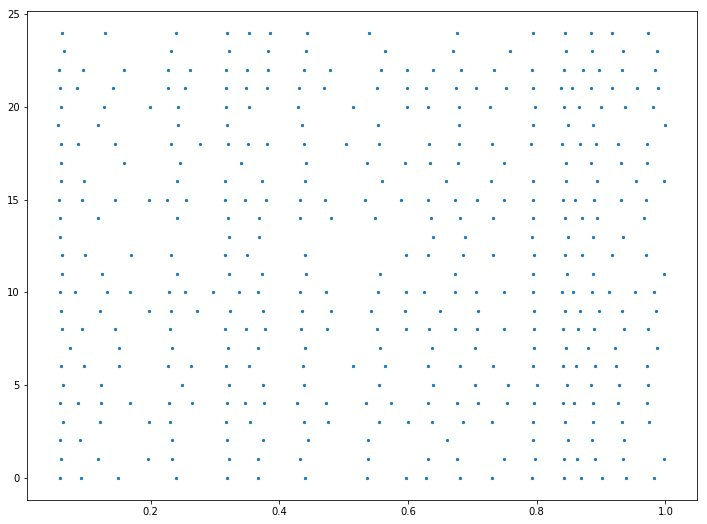

In [0]:
plt.figure(figsize=(12,9))
mask = stim1_df["times"] <1.0 #Restrict plotted spikes to a particular time period
#mask = ((stim1_df["ids"] > 0) & (stim1_df["ids"] <= 1024)) #Restrict plotted spikes to a particular layer
plt.scatter(stim1_df["times"][mask], stim1_df["ids"][mask], s=5)

###Activity during Stimulus 2 presentation

In [0]:
stim2_df = pd.DataFrame(
  data = {
      "ids": np.fromfile("output_spikes_posttraining_stim2SpikeIDs.bin", dtype=np.int32),
      "times": np.fromfile("output_spikes_posttraining_stim2SpikeTimes.bin", dtype=np.float32),
  }
)

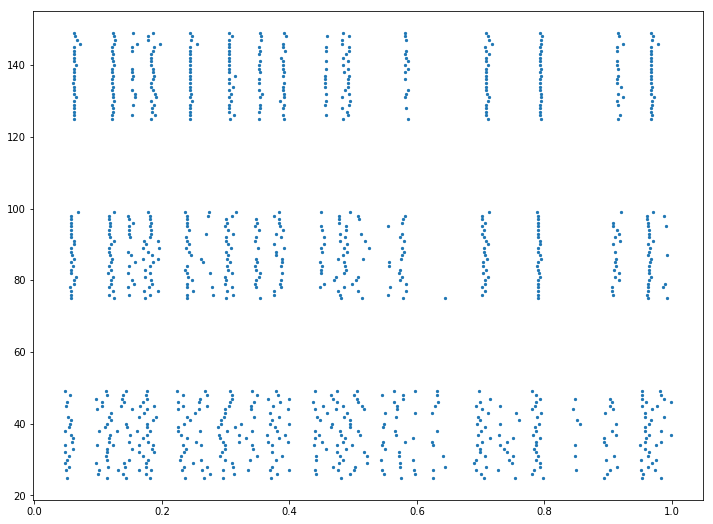

In [0]:
plt.figure(figsize=(12,9))
mask = stim2_df["times"] <1.0
#mask = ((stim2_df["ids"] > 2048) & (stim2_df["ids"] <= 2048+1024))
plt.scatter(stim2_df[:]["times"][mask], stim2_df[:]["ids"][mask], s=5)

###Activity of Stimulus 1 Poisson input

In [0]:
# input1_df = pd.DataFrame(
#   data = {
#       "ids": np.fromfile("input_Poisson_stim1SpikeIDs.bin", dtype=np.int32),
#       "times": np.fromfile("input_Poisson_stim1SpikeTimes.bin", dtype=np.float32),
#   }
# )

In [0]:
# plt.figure(figsize=(12,9))
# mask = input1_df["times"] <4.0
# plt.scatter(input1_df["times"][mask], input1_df["ids"][mask], s=5)

###Activity of Stimulus 2 Poisson input

In [0]:
# input2_df = pd.DataFrame(
#   data = {
#       "ids": np.fromfile("input_Poisson_stim2SpikeIDs.bin", dtype=np.int32),
#       "times": np.fromfile("input_Poisson_stim2SpikeTimes.bin", dtype=np.float32),
#   }
# )

In [0]:

# plt.figure(figsize=(12,9))
# mask = input2_df["times"] <4.0
# plt.scatter(input2_df["times"][mask], input2_df["ids"][mask], s=5)

###Plot Firing Rate Distributions

In [0]:
numinhneurons = (5*5*2*3)
inhfrs_stim1 = np.bincount(stim1_df["ids"].values, minlength=numinhneurons)
inhfrs_stim2 = np.bincount(stim2_df["ids"].values, minlength=numinhneurons)

(array([75.,  0.,  0.,  0.,  0.,  8., 19., 30., 12.,  6.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

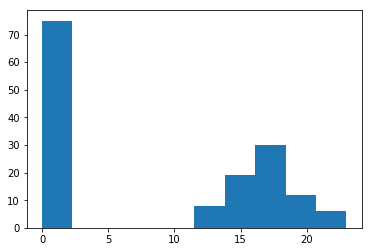

In [0]:
plt.hist(inhfrs_stim1)

(array([75.,  0.,  0.,  0.,  4., 38., 18., 10.,  3.,  2.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

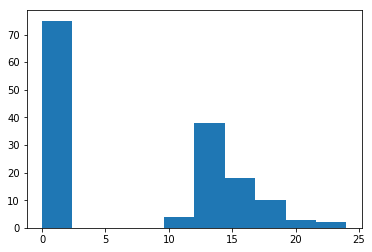

In [0]:
plt.hist(inhfrs_stim2)

###Firing Rate Difference For the Two Stimuli

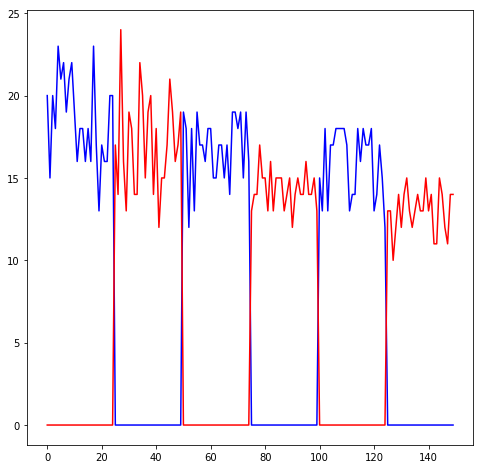

In [0]:
plt.figure(figsize=(8,8))
plt.plot(inhfrs_stim1, color='b')
plt.plot(inhfrs_stim2, color='r')

###Distribution of Weights

In [0]:
num_epochs = 5000

weights_df = pd.DataFrame(
  data = {
      "weights" : np.fromfile("Epoch" + str(num_epochs-1) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32),
      "pres" : np.fromfile("Sandbox_NetworkPresynapticIDs.bin", dtype=np.int32),
      "post" : np.fromfile("Sandbox_NetworkPostsynapticIDs.bin", dtype=np.int32)
  }
)

In [0]:
input_weight_evolution = []
inh_weight_evolution = []

inputmask = (weights_df["pres"] < 0) &(weights_df["pres"] >= -100) 
inhmask = (weights_df["pres"] > 0) &(weights_df["post"] > 0) 


for e in range(num_epochs):
  input_weight_evolution.append(np.fromfile("Epoch" + str(e) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32)[inputmask])
  inh_weight_evolution.append(np.fromfile("Epoch" + str(e) + "Sandbox_NetworkSynapticWeights.bin", dtype=np.float32)[inhmask])


input_mean_weight_evolution = np.mean(np.asarray(input_weight_evolution), axis=1)
inh_mean_weight_evolution = np.mean(np.asarray(inh_weight_evolution), axis=1)

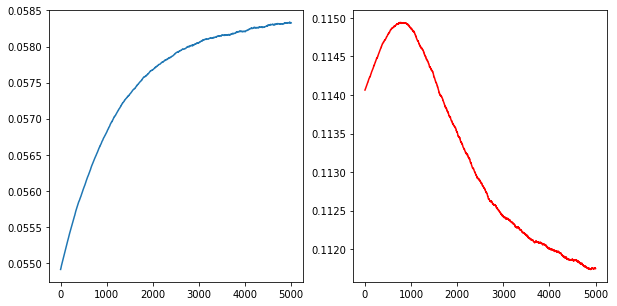

In [0]:


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(input_mean_weight_evolution)

plt.subplot(1,2,2)
plt.plot(inh_mean_weight_evolution, color='r')

(array([149., 143., 172., 176., 203., 229., 201., 251., 228., 241., 531.,
        730., 716., 640., 612., 610., 640., 693., 525., 297., 239., 224.,
        165., 174., 129.]),
 array([0.01001152, 0.01361103, 0.01721053, 0.02081004, 0.02440954,
        0.02800905, 0.03160855, 0.03520805, 0.03880756, 0.04240706,
        0.04600657, 0.04960607, 0.05320558, 0.05680508, 0.06040458,
        0.06400409, 0.0676036 , 0.0712031 , 0.0748026 , 0.0784021 ,
        0.08200161, 0.08560111, 0.08920062, 0.09280012, 0.09639963,
        0.09999913], dtype=float32),
 <a list of 25 Patch objects>)

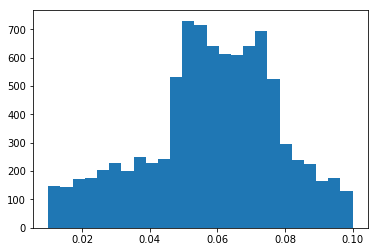

In [0]:
mask = (weights_df["pres"] < 0) &(weights_df["pres"] >= -100) 
plt.hist(weights_df["weights"][mask], bins=25)

(array([4330., 3514., 2594., 1815.,  830.,  494.,  306.,  252.,  256.,
         207.,  223.,  213.,  195.,  191.,  170.,  149.,  157.,  181.,
         166.,  138.,  166.,  177.,  175.,  168.,  174.]),
 array([4.33581590e-04, 2.44152527e-02, 4.83969226e-02, 7.23785907e-02,
        9.63602662e-02, 1.20341934e-01, 1.44323602e-01, 1.68305278e-01,
        1.92286953e-01, 2.16268614e-01, 2.40250289e-01, 2.64231950e-01,
        2.88213640e-01, 3.12195301e-01, 3.36176962e-01, 3.60158652e-01,
        3.84140313e-01, 4.08121973e-01, 4.32103664e-01, 4.56085324e-01,
        4.80066985e-01, 5.04048645e-01, 5.28030336e-01, 5.52012026e-01,
        5.75993657e-01, 5.99975348e-01], dtype=float32),
 <a list of 25 Patch objects>)

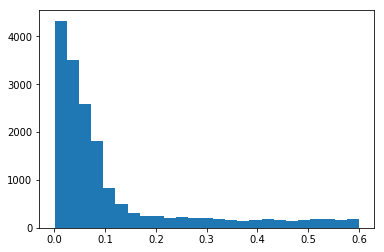

In [0]:
mask = (weights_df["pres"] > 0) &(weights_df["post"] > 0) 
plt.hist(weights_df["weights"][mask], bins=25)

In [0]:
numinhneurons = 5*5*2
neuroninputvector = np.zeros((numinhneurons, 5*5*2))


for neuronid in range(numinhneurons):
  mask = (weights_df["post"].values == neuronid) & (weights_df["pres"].values < 0) & (weights_df["pres"].values >= -5*5*2)
  neuroninputvector[neuronid, weights_df["pres"].values[mask]*-1 -1] = weights_df["weights"].values[mask]

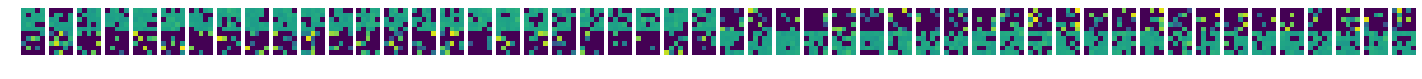

In [0]:
plt.figure(figsize=(25,100))
for neuronid in range(numinhneurons):
  plt.subplot(5*5*2, 5*5*2, 1+neuronid)
  plt.imshow(neuroninputvector[neuronid].reshape(5*2,5), interpolation="nearest", vmin=np.min(neuroninputvector), vmax=np.max(neuroninputvector))
  plt.axis('off')

## Download Data

###Download Method for Smaller Files

In [0]:
from google.colab import files
files.download('output_spikes_posttraining_stim1SpikeIDs.txt') 

In [0]:
from google.colab import files
files.download('output_spikes_posttraining_stim1SpikeTimes.txt') 

In [0]:
from google.colab import files
files.download('output_spikes_posttraining_stim2SpikeIDs.txt') 

In [0]:
from google.colab import files
files.download('output_spikes_posttraining_stim2SpikeTimes.txt') 

###Download Method for Large Files

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cp *.txt ../../../gdrive/My\ Drive/

In [0]:
ls

Brunel10K*
CMakeFiles/
cmake_install.cmake
input_Poisson_stim1SpikeIDs.bin
input_Poisson_stim1SpikeTimes.bin
input_Poisson_stim2SpikeIDs.bin
input_Poisson_stim2SpikeTimes.bin
Makefile
output_spikes_posttraining_stim1SpikeIDs.bin
output_spikes_posttraining_stim1SpikeIDs.txt
output_spikes_posttraining_stim1SpikeTimes.bin
output_spikes_posttraining_stim1SpikeTimes.txt
output_spikes_posttraining_stim2SpikeIDs.bin
output_spikes_posttraining_stim2SpikeIDs.txt
output_spikes_posttraining_stim2SpikeTimes.bin
output_spikes_posttraining_stim2SpikeTimes.txt
Sandbox*
Sandbox_NetworkPostsynapticIDs.bin
Sandbox_NetworkPresynapticIDs.bin
Sandbox_NetworkSynapticDelays.bin
Sandbox_NetworkSynapticWeights.bin
SimpleExample*
stimuli_binary_file.gbo
VogelsAbbottNet*
